In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 1

In [2]:
import sys
sys.path.append('/home/mowp/workspace/mowp_scripts/tools/utils')

In [3]:
%aimport rtools

In [4]:
import pandas as pd
import numpy as np
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
R = ro.r

# python to R

## convert adata to SingleCellExperiment

In [5]:
import scanpy as sc

In [6]:
adata = sc.read_10x_h5(
    filename="/home/mowp/workspace/single_cell_analysis/single-cell-best-practics/dataset/filtered_feature_bc_matrix.h5",
    # backup_url="https://figshare.com/ndownloader/files/39546196",
)
adata.var_names_make_unique()
adata

/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 16934 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

In [7]:
adata_r = rtools.py2r(adata)


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

In [8]:
adata_r

<rpy2.robjects.methods.RS4 object at 0x7f11d6bdfdc0> [RTYPES.S4SXP]
R classes: ('SingleCellExperiment',)

In [9]:
%%R -i adata_r

adata_r

class: SingleCellExperiment 
dim: 36601 16934 
metadata(0):
assays(1): X
rownames(36601): MIR1302-2HG FAM138A ... AC007325.4 AC007325.2
rowData names(4): gene_ids feature_types genome temp_featureName
colnames(16934): AAACAGCCAAGCTTAT-1 AAACAGCCATAGCTTG-1 ...
  TTTGTTGGTTTACTTG-1 TTTGTTGGTTTGTGGA-1
colData names(1): temp_barcodeName
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


## convert adata to seurat object

In [10]:
adata = sc.read_10x_h5(
    filename="/home/mowp/workspace/single_cell_analysis/single-cell-best-practics/dataset/filtered_feature_bc_matrix.h5",
    # backup_url="https://figshare.com/ndownloader/files/39546196",
)
adata.var_names_make_unique()
adata

/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 16934 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

In [11]:
adata.layers['raw'] = adata.X

In [12]:
adata

AnnData object with n_obs × n_vars = 16934 × 36601
    var: 'gene_ids', 'feature_types', 'genome'
    layers: 'raw'

In [13]:
sobj_r = rtools.ad2so(adata)

In [14]:
%%R -i sobj_r

sobj_r

An object of class Seurat 
36601 features across 16934 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)


## Convert pandas dataframe

In [37]:
df = pd.DataFrame(np.random.rand(1000, 10))

In [38]:
df_r = rtools.py2r(df)

## convert array

In [40]:
a = np.array([1, 2, 3, 4, 5])
a_r = rtools.py2r(a)

In [41]:
%%R -i a_r

a_r

[1] 1 2 3 4 5


In [42]:
a = np.array(['a', 'b', 'c', 'd'])
a_r = rtools.py2r(a)

In [43]:
%%R -i a_r

a_r

[1] "a" "b" "c" "d"


# R to python

## convert seurat object to adata

In [ ]:
%%R

library(Seurat)

pbmc_data <- Read10X(data.dir = "/data/user/mowp/data/scRNA/pbmc3k/filtered_gene_bc_matrices/hg19")
pbmc <- CreateSeuratObject(counts = pbmc_data)

In [15]:
%%R

pbmc

An object of class Seurat 
32738 features across 2700 samples within 1 assay 
Active assay: RNA (32738 features, 0 variable features)


In [13]:
pbmc = rtools.so2ad(ro.globalenv['pbmc'])

2023-10-07 16:59:30.599 | INFO     | rtools:so2ad:578 - assay RNA: No variable features are calculated. Pass


In [14]:
pbmc

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA'
    layers: 'RNA_counts', 'RNA_data'

## convert SingleCellExperiment to adata

In [27]:
%%R

library(SingleCellExperiment)
library(DropletUtils)

In [29]:
%%R

sce <- read10xCounts("/data/user/mowp/data/scRNA/pbmc3k/filtered_gene_bc_matrices/hg19")
sce

class: SingleCellExperiment 
dim: 32738 2700 
metadata(1): Samples
assays(1): counts
rownames(32738): ENSG00000243485 ENSG00000237613 ... ENSG00000215616
  ENSG00000215611
rowData names(2): ID Symbol
colnames: NULL
colData names(2): Sample Barcode
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [31]:
sce = rtools.r2py(ro.globalenv['sce'])
sce

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'Sample', 'Barcode'
    var: 'ID', 'Symbol'
    uns: 'Samples'

## convert data.frame to pandas DataFrame

In [45]:
%%R

data <- data.frame(
    x = c(1, 2, 3, 4, 5),
    y = c(1, 2, 3, 4, 5)
)

In [47]:
data = rtools.r2py(ro.globalenv['data'])

In [48]:
data

,x,y
1,1.0,1.0
2,2.0,2.0
3,3.0,3.0
4,4.0,4.0
5,5.0,5.0


## convert vector to np.array

In [49]:
%%R

a <- c(1, 2, 3, 4, 5)

In [50]:
a = rtools.r2py(ro.globalenv['a'])
a

array([1., 2., 3., 4., 5.])

# R plot with r_inline_plot()

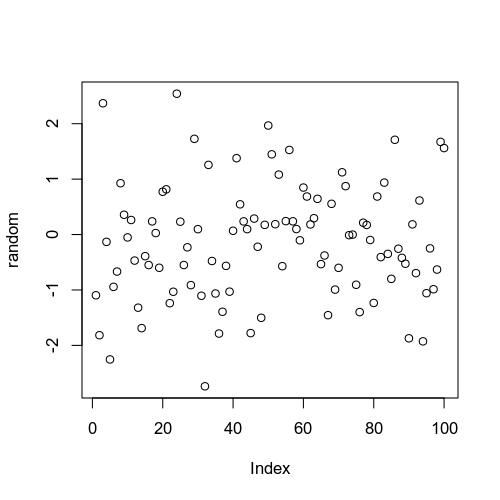

In [6]:
base = importr('base')
stats = importr('stats')

plot = R.plot
rnorm = R.rnorm

with rtools.r_inline_plot():
    plot(rnorm(100), ylab="random")

In [15]:
import session_info

session_info.show()